[*********************100%***********************]  50 of 50 completed


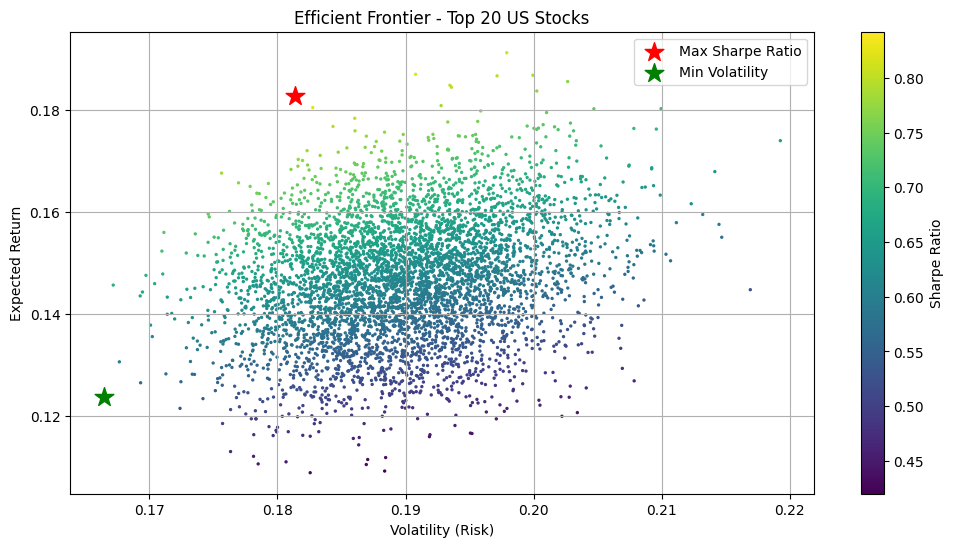

🔍 Optimal Portfolio Weights (Max Sharpe):
 NEE     0.042104
MS      0.041815
ORCL    0.041181
CVX     0.040581
LOW     0.040078
GS      0.039972
TGT     0.037147
BA      0.036978
BABA    0.036418
DUK     0.035652
COST    0.033026
QCOM    0.031102
SHOP    0.030570
CRM     0.030442
PYPL    0.030340
NVO     0.028192
BAC     0.025570
T       0.025085
VZ      0.024622
MRK     0.023685
NKE     0.022931
SBUX    0.020530
COP     0.018685
FDX     0.018503
GE      0.017284
PLTR    0.016810
SAP     0.016561
AXP     0.015650
UPS     0.015087
AMD     0.014685
PFE     0.014544
ABNB    0.013713
BLK     0.011829
IBM     0.011668
NFLX    0.011084
SONY    0.010946
BKNG    0.010690
HON     0.010300
CAT     0.010160
TXN     0.008707
MCD     0.007449
DIS     0.006621
TSM     0.004642
TM      0.004065
UBER    0.003269
WMT     0.002878
ADBE    0.002244
INTC    0.002188
CSCO    0.000918
C       0.000800
dtype: float64


'\nAssumption - Explanation\nReturns are normally distributed\t- Real-world returns are not always normal (fat tails, skewness)\nInvestors are rational\t- In real life, investors may act irrationally (behavioral finance)\nRisk = Standard deviation\t- Downside risk or other risk measures may be more relevant\nNo transaction costs or taxes\t- Unrealistic in practice\nShort selling is allowed (unless constrained)\t- Many funds cannot short or have limits\nMarket is efficient\t- Not always true; mispricings exist'

In [ ]:
#Import Required Libraries
import yfinance as yf       # To download financial data from Yahoo Finance
import numpy as np          # For numerical and matrix operations
import pandas as pd         # For handling and analyzing data in table format
import matplotlib.pyplot as plt  # To create plots
import seaborn as sns       # For beautiful plots (used later if needed)
from scipy.optimize import minimize  # For advanced optimization (not used here, but useful for later)

#Define the Stock List (Top 20 US Companies)
#This is your investment universe – the 20 largest companies by market cap. You will build an optimal portfolio using these.
tickers = [
    'WMT', 'DIS', 'NFLX', 'ORCL', 'INTC', 'CSCO', 'PFE', 'T', 'VZ', 'BAC',
    'C', 'GS', 'MS', 'BLK', 'AXP', 'NKE', 'MCD', 'SBUX', 'COST', 'TGT',
    'LOW', 'IBM', 'AMD', 'ADBE', 'CRM', 'PYPL', 'QCOM', 'TXN', 'HON', 'CAT',
    'GE', 'BA', 'UPS', 'FDX', 'CVX', 'COP', 'NEE', 'DUK', 'PLTR', 'ABNB',
    'UBER', 'SHOP', 'BKNG', 'TM', 'SONY', 'NVO', 'MRK', 'TSM', 'BABA', 'SAP'
]


#Download Stock Data from Yahoo Finance
data = yf.download(tickers, start="2021-01-01", end="2025-06-30", auto_adjust=True)


#Ensure Consistency in Column Naming - Sometimes auto_adjust=True still puts data under 'Close' column. This ensures we uniformly refer to it as 'Adj Close'.
if 'Close' in data.columns:
    data = data.rename(columns={'Close': 'Adj Close'})


#Select Just the Prices You Need
data = data['Adj Close']

# Clean the Data - Remove any rows (dates) where data is missing for any stock. Ensures calculations don’t break.
data = data.dropna()

#Calculate Daily Returns
daily_returns = data.pct_change().dropna()
#% change calculates the daily return for each stock.

"""Example:
If a stock goes from $100 to $105, return = 5%"""

#Calculate Mean and Covariance of Returns
mean_returns = daily_returns.mean()
cov_matrix = daily_returns.cov()
num_assets = len(tickers)
"""
mean_returns: average daily return per stock
cov_matrix: shows how much two stocks move together
Used to understand risk and diversification
num_assets: number of stocks (20 here)   """

#Simulate 10,000 Random Portfolios
num_portfolios = 5000
results = np.zeros((3, num_portfolios))  # [Return, Volatility, Sharpe Ratio]
weights_record = []
"""
You’re generating 10,000 portfolios with random weights.

Each portfolio will have:
Expected Return
Volatility (Risk)
Sharpe Ratio"""

# Set the Risk-Free Rate (for Sharpe Ratio)
risk_free_rate = 0.03 / 252
"""Annual risk-free rate = 3%
Divided by 252 (trading days) to get daily risk-free rate"""


# Monte Carlo Simulation Loop
for i in range(num_portfolios):
    weights = np.random.random(num_assets)     # Random weights
    weights /= np.sum(weights)                 # Normalize to make them sum to 1
    weights_record.append(weights)             # Save the weights

    port_return = np.dot(weights, mean_returns) * 252         # Annual return
    port_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(252)  # Annual volatility
    sharpe = (port_return - 0.03) / port_volatility            # Annual Sharpe Ratio

    results[0, i] = port_return
    results[1, i] = port_volatility
    results[2, i] = sharpe

"""Weights: randomly allocate money to each stock.

np.dot: weighted average for return and covariance for risk.

Multiply by 252 to annualize returns and risk.

Sharpe Ratio = extra return you get per unit of risk."""

#Convert Results to a DataFrame - Make a table with each row representing a simulated portfolio.
results_df = pd.DataFrame(results.T, columns=['Return', 'Volatility', 'Sharpe Ratio'])


#Identify Optimal Portfolios
max_sharpe_idx = results_df['Sharpe Ratio'].idxmax()
min_vol_idx = results_df['Volatility'].idxmin()
"""Portfolio with highest Sharpe Ratio = best risk-adjusted return.
Portfolio with lowest volatility = most stable/least risky."""


#  Plot the Efficient Frontier
plt.figure(figsize=(12, 6))
plt.scatter(results_df['Volatility'], results_df['Return'], c=results_df['Sharpe Ratio'], cmap='viridis', s=2)
plt.colorbar(label='Sharpe Ratio')
plt.scatter(results_df.loc[max_sharpe_idx, 'Volatility'], results_df.loc[max_sharpe_idx, 'Return'],
            color='r', marker='*', s=200, label='Max Sharpe Ratio')
plt.scatter(results_df.loc[min_vol_idx, 'Volatility'], results_df.loc[min_vol_idx, 'Return'],
            color='g', marker='*', s=200, label='Min Volatility')
plt.title('Efficient Frontier - Top 20 US Stocks')
plt.xlabel('Volatility (Risk)')
plt.ylabel('Expected Return')
plt.legend()
plt.grid(True)
plt.show()
"""
This shows the Efficient Frontier — the curve of best possible portfolios.

Color = Sharpe Ratio (darker = better)

Red star = best return per risk

Green star = most stable portfolio (lowest risk)"""


#Show the Best Portfolio Weights
best_weights = pd.Series(weights_record[max_sharpe_idx], index=tickers)
print("🔍 Optimal Portfolio Weights (Max Sharpe):\n", best_weights.sort_values(ascending=False))

"""
Shows how much of your money to invest in each stock
Based on highest Sharpe Ratio (i.e., most efficient portfolio)"""


"""
Assumption - Explanation
Returns are normally distributed	- Real-world returns are not always normal (fat tails, skewness)
Investors are rational	- In real life, investors may act irrationally (behavioral finance)
Risk = Standard deviation	- Downside risk or other risk measures may be more relevant
No transaction costs or taxes	- Unrealistic in practice
Short selling is allowed (unless constrained)	- Many funds cannot short or have limits
Market is efficient	- Not always true; mispricings exist"""


[*********************100%***********************]  50 of 50 completed


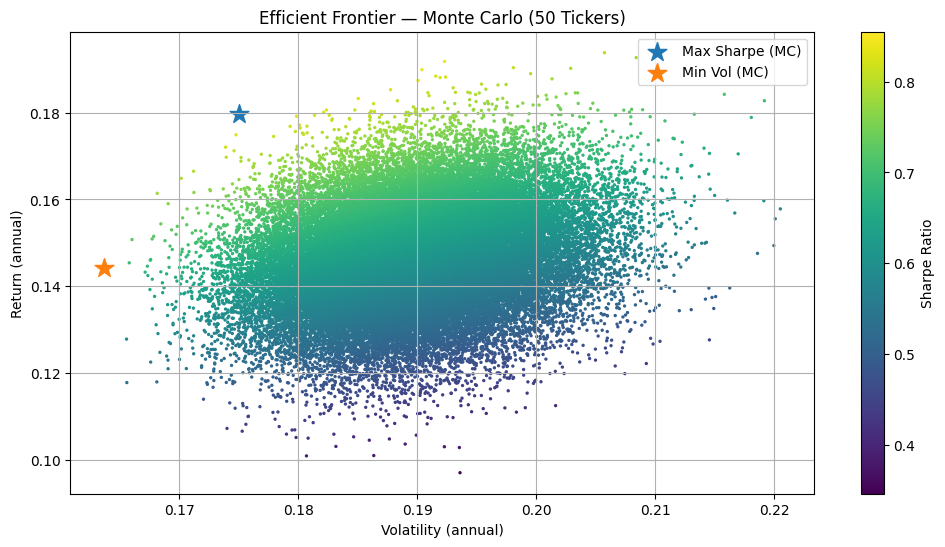

🔍 Optimal Monte Carlo Weights (Max Sharpe):
CRM     0.041949
ORCL    0.041705
PYPL    0.041251
FDX     0.040996
TGT     0.040292
PLTR    0.038271
SBUX    0.037433
UPS     0.037430
UBER    0.037352
BA      0.036210
DUK     0.035172
SONY    0.034160
dtype: float64


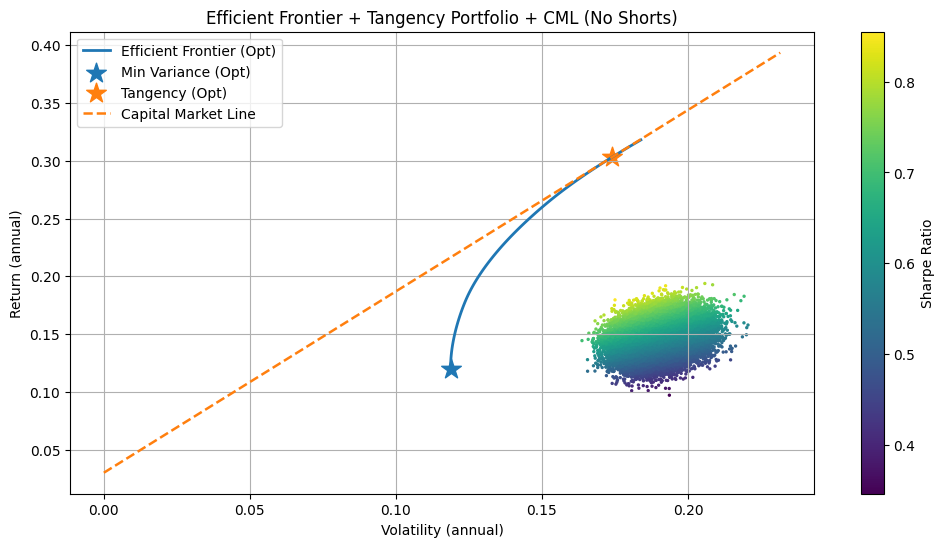


=== Optimized Portfolios Summary ===
                  Portfolio  Return (annual)  Volatility (annual)  Sharpe (annual, rf=3%)
         Min Variance (Opt)         0.120159             0.118702                0.759546
Tangency / Max Sharpe (Opt)         0.302875             0.173835                1.569731

=== Tangency Weights (Top 12) ===
AMD     2.250226e-01
TGT     2.133161e-01
MS      1.307918e-01
SAP     8.177975e-02
GS      7.119035e-02
UPS     6.676201e-02
BA      6.645332e-02
SBUX    6.328146e-02
CVX     5.835360e-02
SHOP    1.188392e-02
CAT     1.116509e-02
COP     7.983865e-15
dtype: float64

=== Min-Variance Weights (Top 12) ===
PYPL    0.190861
SBUX    0.168287
SAP     0.122107
QCOM    0.106881
BABA    0.106360
NKE     0.067205
FDX     0.047924
TM      0.044272
SONY    0.042461
AMD     0.031304
BA      0.024957
DUK     0.019675
dtype: float64


In [ ]:
# ===========================
# Modern Portfolio Theory in Python — 50 Tickers (2021-01-01 to 2025-06-30)
# ===========================

# --- Imports
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import warnings
warnings.filterwarnings("ignore")

# --- Define Stock Universe (50 names)
tickers = [
    'WMT', 'DIS', 'NFLX', 'ORCL', 'INTC', 'CSCO', 'PFE', 'T', 'VZ', 'BAC',
    'C', 'GS', 'MS', 'BLK', 'AXP', 'NKE', 'MCD', 'SBUX', 'COST', 'TGT',
    'LOW', 'IBM', 'AMD', 'ADBE', 'CRM', 'PYPL', 'QCOM', 'TXN', 'HON', 'CAT',
    'GE', 'BA', 'UPS', 'FDX', 'CVX', 'COP', 'NEE', 'DUK', 'PLTR', 'ABNB',
    'UBER', 'SHOP', 'BKNG', 'TM', 'SONY', 'NVO', 'MRK', 'TSM', 'BABA', 'SAP'
]

# --- Download Stock Data (auto-adjusted close)
data = yf.download(tickers, start="2021-01-01", end="2025-06-30", auto_adjust=True)

# --- Ensure we use Adjusted Close
if 'Close' in data.columns:
    data = data.rename(columns={'Close': 'Adj Close'})
prices = data['Adj Close'].dropna(how='any')  # drop rows with any missing

# --- Daily returns and stats
daily_returns = prices.pct_change().dropna()
mean_returns = daily_returns.mean()
cov_matrix = daily_returns.cov()
num_assets = len(tickers)

# --- Parameters
TRADING_DAYS = 252
rf_annual = 0.03  # 3% annual risk-free (adjust if you like)

# --- Monte Carlo Simulation (for visualization/reference)
num_portfolios = 50000
results = np.zeros((3, num_portfolios))  # [Return, Vol, Sharpe]
weights_record = []

for i in range(num_portfolios):
    w = np.random.random(num_assets)
    w /= w.sum()
    weights_record.append(w)

    pr = float(np.dot(w, mean_returns) * TRADING_DAYS)
    pv = float(np.sqrt(np.dot(w.T, np.dot(cov_matrix, w))) * np.sqrt(TRADING_DAYS))
    sr = (pr - rf_annual) / pv

    results[0, i] = pr
    results[1, i] = pv
    results[2, i] = sr

results_df = pd.DataFrame(results.T, columns=['Return', 'Volatility', 'Sharpe Ratio'])
max_sharpe_idx = results_df['Sharpe Ratio'].idxmax()
min_vol_idx = results_df['Volatility'].idxmin()

# --- Plot Monte Carlo cloud
plt.figure(figsize=(12, 6))
plt.scatter(results_df['Volatility'], results_df['Return'],
            c=results_df['Sharpe Ratio'], s=2)
plt.colorbar(label='Sharpe Ratio')
plt.scatter(results_df.loc[max_sharpe_idx, 'Volatility'], results_df.loc[max_sharpe_idx, 'Return'],
            marker='*', s=200, label='Max Sharpe (MC)')
plt.scatter(results_df.loc[min_vol_idx, 'Volatility'], results_df.loc[min_vol_idx, 'Return'],
            marker='*', s=200, label='Min Vol (MC)')
plt.title('Efficient Frontier — Monte Carlo (50 Tickers)')
plt.xlabel('Volatility (annual)')
plt.ylabel('Return (annual)')
plt.legend()
plt.grid(True)
plt.show()

print("🔍 Optimal Monte Carlo Weights (Max Sharpe):")
print(pd.Series(weights_record[max_sharpe_idx], index=tickers).sort_values(ascending=False).head(12))

# ===========================
# Optimized Frontier + Tangency + CML (No short-selling)
# ===========================

def ann_return(w, mean_daily): return float(np.dot(w, mean_daily) * TRADING_DAYS)
def ann_vol(w, cov_daily): return float(np.sqrt(np.dot(w.T, np.dot(cov_daily, w))) * np.sqrt(TRADING_DAYS))
def sharpe(w, mean_daily, cov_daily, rf=rf_annual):
    r, v = ann_return(w, mean_daily), ann_vol(w, cov_daily)
    return (r - rf) / v

def _neg_sharpe(w, m, c, rf=rf_annual): return -sharpe(w, m, c, rf)

w0 = np.repeat(1/num_assets, num_assets)
bounds_no_short = tuple((0.0, 1.0) for _ in range(num_assets))
budget = {'type': 'eq', 'fun': lambda w: np.sum(w) - 1.0}

# Min-Variance
minvar_res = minimize(lambda w: ann_vol(w, cov_matrix), w0,
                      method='SLSQP', bounds=bounds_no_short, constraints=[budget])
w_minvar = minvar_res.x
ret_minvar = ann_return(w_minvar, mean_returns)
vol_minvar = ann_vol(w_minvar, cov_matrix)
sharpe_minvar = (ret_minvar - rf_annual) / vol_minvar

# Tangency (Max Sharpe)
tangency_res = minimize(_neg_sharpe, w0,
                        args=(mean_returns, cov_matrix, rf_annual),
                        method='SLSQP', bounds=bounds_no_short, constraints=[budget])
w_tan = tangency_res.x
ret_tan = ann_return(w_tan, mean_returns)
vol_tan = ann_vol(w_tan, cov_matrix)
sharpe_tan = (ret_tan - rf_annual) / vol_tan

# Exact Efficient Frontier (sweep target returns)
target_returns = np.linspace(ret_minvar, max(results_df['Return'].max(), ret_tan)*1.05, 70)
ef_vols, ef_wts = [], []

for tr in target_returns:
    cons = (
        budget,
        {'type': 'eq', 'fun': lambda w, trg=tr: ann_return(w, mean_returns) - trg}
    )
    res = minimize(lambda w: ann_vol(w, cov_matrix), w0,
                   method='SLSQP', bounds=bounds_no_short, constraints=cons,
                   options={'maxiter': 1000})
    if res.success:
        ef_vols.append(ann_vol(res.x, cov_matrix))
        ef_wts.append(res.x)
    else:
        ef_vols.append(np.nan)
        ef_wts.append(np.full(num_assets, np.nan))

ef_vols = np.array(ef_vols)

# Capital Market Line
slope = (ret_tan - rf_annual) / vol_tan
cml_sigmas = np.linspace(0.0, max(results_df['Volatility'].max(), vol_tan)*1.05, 60)
cml_returns = rf_annual + slope * cml_sigmas

# Plot: cloud + frontier + markers + CML
plt.figure(figsize=(12, 6))
plt.scatter(results_df['Volatility'], results_df['Return'],
            c=results_df['Sharpe Ratio'], s=2)
plt.colorbar(label='Sharpe Ratio')
plt.plot(ef_vols, target_returns, linewidth=2, label='Efficient Frontier (Opt)')
plt.scatter(vol_minvar, ret_minvar, marker='*', s=220, label='Min Variance (Opt)')
plt.scatter(vol_tan, ret_tan, marker='*', s=220, label='Tangency (Opt)')
plt.plot(cml_sigmas, cml_returns, linestyle='--', linewidth=1.8, label='Capital Market Line')
plt.title('Efficient Frontier + Tangency Portfolio + CML (No Shorts)')
plt.xlabel('Volatility (annual)')
plt.ylabel('Return (annual)')
plt.legend()
plt.grid(True)
plt.show()

# Summaries
opt_summ = pd.DataFrame({
    'Portfolio': ['Min Variance (Opt)', 'Tangency / Max Sharpe (Opt)'],
    'Return (annual)': [ret_minvar, ret_tan],
    'Volatility (annual)': [vol_minvar, vol_tan],
    'Sharpe (annual, rf=3%)': [sharpe_minvar, sharpe_tan]
})
print("\n=== Optimized Portfolios Summary ===")
print(opt_summ.to_string(index=False))

print("\n=== Tangency Weights (Top 12) ===")
print(pd.Series(w_tan, index=tickers).sort_values(ascending=False).head(12))

print("\n=== Min-Variance Weights (Top 12) ===")
print(pd.Series(w_minvar, index=tickers).sort_values(ascending=False).head(12))


[*********************100%***********************]  50 of 50 completed


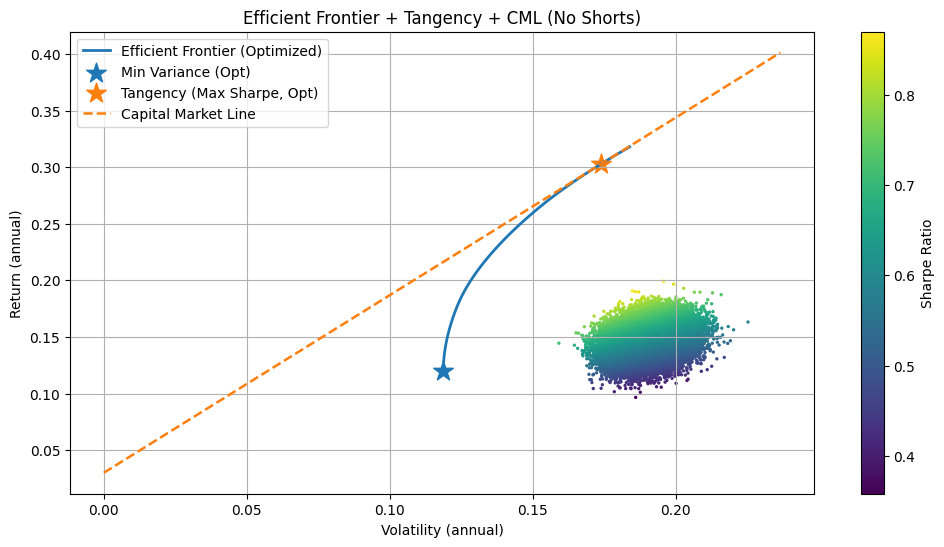


**SUMMARY — KEY PORTFOLIOS**
                   Portfolio  Return (annual)  Volatility (annual)  Sharpe (rf=3%)
          Min Variance (Opt)         0.120159             0.118702        0.759546
 Tangency / Max Sharpe (Opt)         0.302875             0.173835        1.569731
Monte Carlo Max Sharpe (Ref)         0.190756             0.184786        0.869956

**TANGENCY WEIGHTS (Top 12)**
AMD     2.250227e-01
TGT     2.133160e-01
MS      1.307914e-01
SAP     8.178005e-02
GS      7.119023e-02
UPS     6.676212e-02
BA      6.645320e-02
SBUX    6.328171e-02
CVX     5.835371e-02
SHOP    1.188357e-02
CAT     1.116520e-02
PYPL    2.001170e-15
dtype: float64

**MIN-VARIANCE WEIGHTS (Top 12)**
PYPL    0.190861
SBUX    0.168286
SAP     0.122107
QCOM    0.106881
BABA    0.106361
NKE     0.067205
FDX     0.047924
TM      0.044273
SONY    0.042461
AMD     0.031305
BA      0.024957
DUK     0.019675
dtype: float64

**MONTE CARLO MAX-SHARPE WEIGHTS (Top 12) [Reference]**
CVX     0.042564
AXP     0.04

In [ ]:
# ===========================
# Modern Portfolio Theory — 50 Tickers (2021-01-01 to 2025-06-30)
# With an Interpretation & Decisions Section (bold headings)
# ===========================

# --- Imports
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import warnings
warnings.filterwarnings("ignore")

# --- Universe (50 names)
tickers = [
    'WMT', 'DIS', 'NFLX', 'ORCL', 'INTC', 'CSCO', 'PFE', 'T', 'VZ', 'BAC',
    'C', 'GS', 'MS', 'BLK', 'AXP', 'NKE', 'MCD', 'SBUX', 'COST', 'TGT',
    'LOW', 'IBM', 'AMD', 'ADBE', 'CRM', 'PYPL', 'QCOM', 'TXN', 'HON', 'CAT',
    'GE', 'BA', 'UPS', 'FDX', 'CVX', 'COP', 'NEE', 'DUK', 'PLTR', 'ABNB',
    'UBER', 'SHOP', 'BKNG', 'TM', 'SONY', 'NVO', 'MRK', 'TSM', 'BABA', 'SAP'
]

# --- Parameters
START, END = "2021-01-01", "2025-06-30"
TRADING_DAYS = 252
rf_annual = 0.03  # 3% annual risk-free

# --- Data
raw = yf.download(tickers, start=START, end=END, auto_adjust=True)
if 'Close' in raw.columns:
    raw = raw.rename(columns={'Close': 'Adj Close'})
prices = raw['Adj Close'].dropna(how='any')  # drop any rows with missing assets

# --- Returns & Stats
daily = prices.pct_change().dropna()
mean_returns = daily.mean()
cov_matrix = daily.cov()
num_assets = len(tickers)

# --- Monte Carlo (for visualization/reference)
num_portfolios = 50000
cloud = np.zeros((3, num_portfolios))  # [Return, Vol, Sharpe]
weights_record = []

for i in range(num_portfolios):
    w = np.random.random(num_assets)
    w /= w.sum()
    weights_record.append(w)

    pr = float(np.dot(w, mean_returns) * TRADING_DAYS)
    pv = float(np.sqrt(np.dot(w.T, np.dot(cov_matrix, w))) * np.sqrt(TRADING_DAYS))
    sr = (pr - rf_annual) / pv
    cloud[0, i], cloud[1, i], cloud[2, i] = pr, pv, sr

cloud_df = pd.DataFrame(cloud.T, columns=['Return', 'Volatility', 'Sharpe'])
mc_max_sharpe_idx = cloud_df['Sharpe'].idxmax()
mc_min_vol_idx = cloud_df['Volatility'].idxmin()

# --- Optimization helpers
def ann_return(w): return float(np.dot(w, mean_returns) * TRADING_DAYS)
def ann_vol(w):    return float(np.sqrt(np.dot(w.T, np.dot(cov_matrix, w))) * np.sqrt(TRADING_DAYS))
def sharpe(w):     return (ann_return(w) - rf_annual) / ann_vol(w)
def _neg_sharpe(w): return -sharpe(w)

w0 = np.repeat(1/num_assets, num_assets)
bounds_no_short = tuple((0.0, 1.0) for _ in range(num_assets))
budget = {'type': 'eq', 'fun': lambda w: np.sum(w) - 1.0}

# --- Min-Variance (no short)
res_minvar = minimize(lambda w: ann_vol(w), w0, method='SLSQP',
                      bounds=bounds_no_short, constraints=[budget])
w_minvar = res_minvar.x
ret_minvar, vol_minvar = ann_return(w_minvar), ann_vol(w_minvar)
sr_minvar = (ret_minvar - rf_annual) / vol_minvar

# --- Tangency / Max-Sharpe (no short)
res_tan = minimize(_neg_sharpe, w0, method='SLSQP',
                   bounds=bounds_no_short, constraints=[budget])
w_tan = res_tan.x
ret_tan, vol_tan = ann_return(w_tan), ann_vol(w_tan)
sr_tan = (ret_tan - rf_annual) / vol_tan

# --- Exact Efficient Frontier (sweep target returns)
targets = np.linspace(ret_minvar, max(cloud_df['Return'].max(), ret_tan) * 1.05, 70)
ef_vols, ef_wts = [], []
for tr in targets:
    cons = (budget, {'type': 'eq', 'fun': lambda w, trg=tr: ann_return(w) - trg})
    res = minimize(lambda w: ann_vol(w), w0, method='SLSQP',
                   bounds=bounds_no_short, constraints=cons, options={'maxiter': 1000})
    if res.success:
        ef_vols.append(ann_vol(res.x))
        ef_wts.append(res.x)
    else:
        ef_vols.append(np.nan)
        ef_wts.append(np.full(num_assets, np.nan))
ef_vols = np.array(ef_vols)

# --- Capital Market Line (through tangency)
slope = (ret_tan - rf_annual) / vol_tan
cml_sigmas = np.linspace(0.0, max(cloud_df['Volatility'].max(), vol_tan) * 1.05, 60)
cml_returns = rf_annual + slope * cml_sigmas

# --- Plot
plt.figure(figsize=(12, 6))
plt.scatter(cloud_df['Volatility'], cloud_df['Return'], c=cloud_df['Sharpe'], s=2)
plt.colorbar(label='Sharpe Ratio')
plt.plot(ef_vols, targets, linewidth=2, label='Efficient Frontier (Optimized)')
plt.scatter(vol_minvar, ret_minvar, marker='*', s=220, label='Min Variance (Opt)')
plt.scatter(vol_tan, ret_tan, marker='*', s=220, label='Tangency (Max Sharpe, Opt)')
plt.plot(cml_sigmas, cml_returns, linestyle='--', linewidth=1.8, label='Capital Market Line')
plt.title('Efficient Frontier + Tangency + CML (No Shorts)')
plt.xlabel('Volatility (annual)')
plt.ylabel('Return (annual)')
plt.legend()
plt.grid(True)
plt.show()

# --- Utilities for readable tables
def top_weights(series, top=10):
    return series.sort_values(ascending=False).head(top)

# --- Tables / key numbers
mc_best = cloud_df.loc[mc_max_sharpe_idx].to_dict()
mc_minv = cloud_df.loc[mc_min_vol_idx].to_dict()
tan_w = pd.Series(w_tan, index=tickers)
minv_w = pd.Series(w_minvar, index=tickers)
mc_w   = pd.Series(weights_record[mc_max_sharpe_idx], index=tickers)

summary = pd.DataFrame({
    'Portfolio': ['Min Variance (Opt)', 'Tangency / Max Sharpe (Opt)', 'Monte Carlo Max Sharpe (Ref)'],
    'Return (annual)': [ret_minvar, ret_tan, mc_best['Return']],
    'Volatility (annual)': [vol_minvar, vol_tan, mc_best['Volatility']],
    'Sharpe (rf=3%)': [sr_minvar, sr_tan, mc_best['Sharpe']]
})

print("\n**SUMMARY — KEY PORTFOLIOS**")
print(summary.to_string(index=False))

print("\n**TANGENCY WEIGHTS (Top 12)**")
print(top_weights(tan_w, 12))

print("\n**MIN-VARIANCE WEIGHTS (Top 12)**")
print(top_weights(minv_w, 12))

print("\n**MONTE CARLO MAX-SHARPE WEIGHTS (Top 12) [Reference]**")
print(top_weights(mc_w, 12))

# ===========================
# INTERPRETATION & DECISIONS
# ===========================

# Helper to compute mix of risk-free & tangency for a target volatility
def mix_for_target_vol(target_vol):
    """
    Returns (weight_in_tangency, weight_in_riskfree, expected_return)
    along the Capital Market Line to hit target_vol (if feasible).
    """
    if target_vol < 0:
        return np.nan, np.nan, np.nan
    # CML: portfolio sigma = a * vol_tan  (a is weight in tangency; 1-a in risk-free)
    a = target_vol / vol_tan
    ret = rf_annual + a * (ret_tan - rf_annual)
    return a, (1 - a), ret

# Example suggested mixes for common risk appetites
vol_buckets = {
    'Conservative (~8% vol)': 0.08,
    'Moderate (~12% vol)': 0.12,
    'Aggressive (~18% vol)': 0.18
}
mix_table = []
for label, tv in vol_buckets.items():
    a, rf_w, r = mix_for_target_vol(tv)
    mix_table.append([label, tv, max(min(a, 1.5), -0.5), rf_w, r])  # show if leverage (>1) would be needed

mix_df = pd.DataFrame(mix_table, columns=['Profile', 'Target Vol', 'Tangency Weight (a)', 'Risk-free Weight (1-a)', 'Expected Return'])

print("\n**HOW TO USE THE GRAPH — INTERPRETATION**")
print(
f"""
- **Scatter cloud (colored by Sharpe)**: Each dot is a random portfolio. Dots up/left are better (higher return for lower risk).
- **Efficient Frontier (solid line)**: The upper edge of the feasible region — portfolios here are **mean–variance optimal**.
- **Tangency point (star)**: The portfolio with the **highest Sharpe** vs. rf=3%. It defines the **Capital Market Line (CML)**.
- **Capital Market Line (dashed)**: All optimal combinations of the **risk-free asset** and the **tangency portfolio**.
- **Min-Variance point (star)**: The **lowest-risk** all-equity portfolio (no shorts). Good baseline for very low volatility needs.

**Key numbers:**
• Tangency: Return ≈ {ret_tan:.2%}, Volatility ≈ {vol_tan:.2%}, Sharpe ≈ {sr_tan:.2f}
• Min-Var:  Return ≈ {ret_minvar:.2%}, Volatility ≈ {vol_minvar:.2%}, Sharpe ≈ {sr_minvar:.2f}
"""
)

print("**DECISION GUIDE (choose based on risk preference)**")
print(
f"""
- **Conservative**: Mix the **risk-free asset** with the **tangency** to hit a low target volatility.
- **Moderate**: Allocate more to **tangency** (e.g., ~60–80%) and the rest to risk-free.
- **Aggressive**: Heavily weight **tangency** (even >100% if leverage allowed), or choose a point on the **upper** efficient frontier above tangency if you **cannot** borrow.

**Suggested example mixes along the CML (rf=3%):**
{mix_df.to_string(index=False)}

**How to read weights above 100%**: If the Tangency Weight (a) > 1, that implies leverage (borrowing) to extend on the CML.
If leverage is **not** allowed, cap at 100% tangency and accept the resulting volatility/return.
"""
)

# Data quality notes
dropped_days = len(raw['Adj Close']) - len(prices)
if dropped_days > 0:
    print("\n**DATA NOTE**")
    print(f"- Dropped {dropped_days} trading-day rows due to missing prices across one or more tickers (ensures consistent panel).")

print("\n**NEXT STEPS**")
print(
"""
- Add **position caps** (e.g., ≤10% per stock) or **sector caps** to manage concentration risk.
- Run an **out-of-sample backtest** (train on 2021–2023, test on 2024–H1 2025) to check robustness.
- Consider **transaction costs** and **rebalance frequency** (e.g., quarterly) in a live setting.
"""
)
